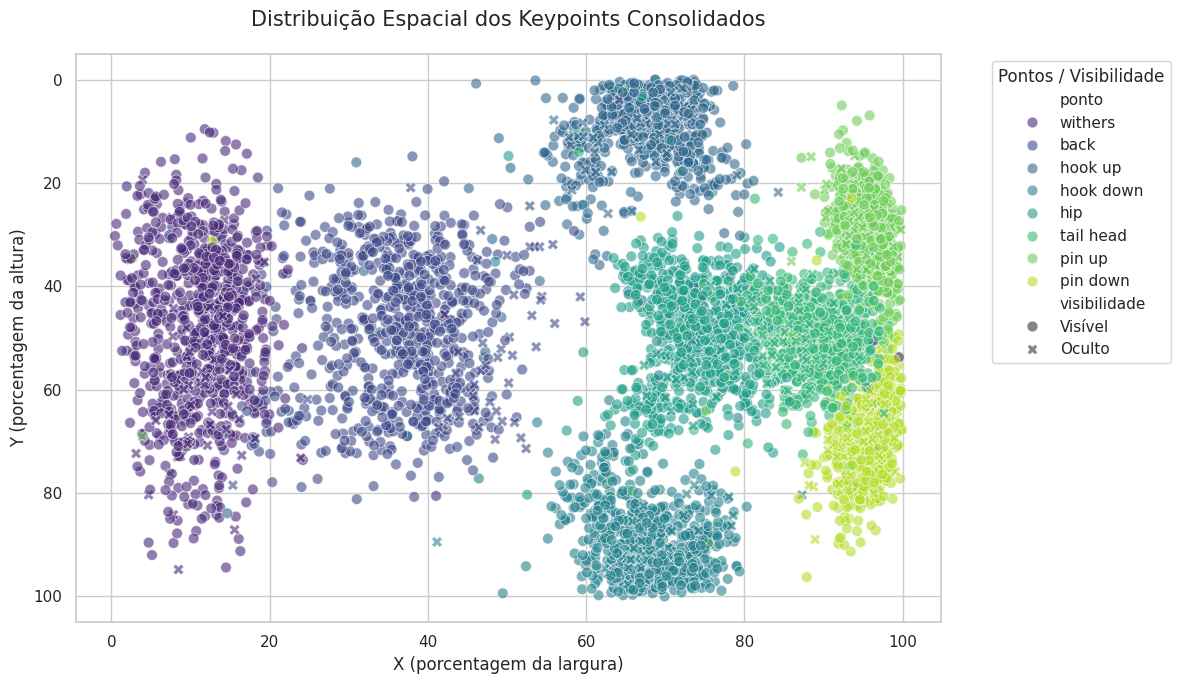

------------------------------
CONTAGEM DE PONTOS POR ALUNO
------------------------------
aluno
15 - Marcelo Azevedo (pronto)          704
12 - Israel (pronto)                   399
17 - Miguel (pronto)                   385
21 - Raquel (pronto)                   376
11 - Gustavo (pronto)                  376
01 - Thales (pronto)                   367
13 - Juliano (pronto)                  360
07 - Carlos Henrique (pronto)          353
22 - Renato (pronto)                   352
08 - Eduardo Braga (pronto)            351
14 - Lucas (pronto)                    351
23 - Ronen (pronto)                    351
20 - Rafael (pronto)                   351
04 - Alex (pronto)                     351
19 - Paulo (pronto)                    351
05 - Camilla (pronto)                  350
06 - Carlos Augusto (pronto)           350
03 - Raony (pronto)                    350
13 - Juliano - Complemento (pronto)     40
Name: count, dtype: int64

Total de pontos no dataset: 6868


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 1. Carregar os dados consolidados
caminho_csv = Path('../data/processed/dataset_completo.csv')

if caminho_csv.exists():
    df = pd.read_csv(caminho_csv)
    
    # 2. Configuração estética do gráfico
    plt.figure(figsize=(12, 7))
    sns.set_theme(style="whitegrid")

    # 3. Criação do gráfico de dispersão
    scatter = sns.scatterplot(
        data=df, 
        x='x', 
        y='y', 
        hue='ponto', 
        style='visibilidade',
        palette='viridis',
        alpha=0.6,
        s=60 # Aumentei um pouco o tamanho dos pontos para melhor visibilidade
    )

    # 4. Ajustes de layout e legendas
    plt.title('Distribuição Espacial dos Keypoints Consolidados', fontsize=15, pad=20)
    plt.xlabel('X (porcentagem da largura)', fontsize=12)
    plt.ylabel('Y (porcentagem da altura)', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Pontos / Visibilidade')
    
    # O topo da imagem é o y=0, por isso invertemos o eixo
    plt.gca().invert_yaxis() 

    plt.tight_layout()
    plt.show()

    # 5. Resumo estatístico por aluno
    print("-" * 30)
    print("CONTAGEM DE PONTOS POR ALUNO")
    print("-" * 30)
    contagem = df['aluno'].value_counts()
    print(contagem)
    print(f"\nTotal de pontos no dataset: {len(df)}")
    
else:
    print(f"Erro: O arquivo {caminho_csv} não foi encontrado. Verifique se rodou o notebook de extração primeiro.")

🔍 Buscando imagem para: 20260107_142003_baia23_VIPWX na pasta: ../data/raw/08 - Eduardo Braga (pronto)
✅ Imagem encontrada: 20260107_142003_baia23_VIPWX.jpg


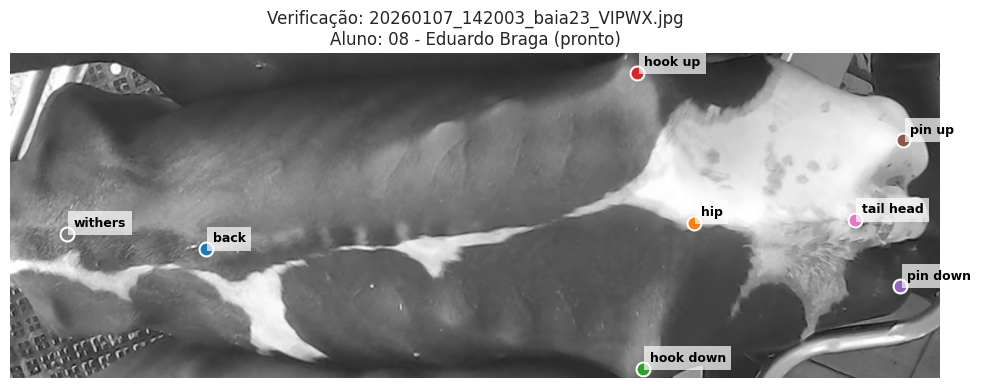

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
import numpy as np

def visualizar_exemplo(df, caminho_base_imagens, index=0):
    base_path = Path(caminho_base_imagens)
    row = df.iloc[index]
    pasta_aluno = base_path / row['aluno']
    
    # Extrai apenas a parte final do nome (removendo o hash se houver)
    # Ex: '11add74b-20260107_142003_baia23_VIPWX.jpg' -> '20260107_142003_baia23_VIPWX'
    nome_original = row['imagem'].split('-')[-1].split('.')[0]
    
    print(f"🔍 Buscando imagem para: {nome_original} na pasta: {pasta_aluno}")

    # Busca qualquer arquivo que contenha essa parte do nome
    arquivos_na_pasta = list(pasta_aluno.glob(f"*{nome_original}*"))
    
    if not arquivos_na_pasta:
        # Última tentativa: listar todos os arquivos e mostrar para você o que tem lá
        todos = [f.name for f in pasta_aluno.iterdir() if f.is_file()][:5]
        print(f"❌ Erro: Não encontrei '{nome_original}'.")
        print(f"📂 Arquivos disponíveis na pasta (amostra): {todos}")
        return
    
    img_path = arquivos_na_pasta[0]
    print(f"✅ Imagem encontrada: {img_path.name}")

    try:
        img = Image.open(img_path)
        w, h = img.size
        img_array = np.array(img)
    except Exception as e:
        print(f"❌ Erro ao carregar: {e}")
        return

    plt.figure(figsize=(12, 8))
    plt.imshow(img_array)
    
    pontos_imagem = df[df['imagem'] == row['imagem']]
    labels_unicas = sorted(df['ponto'].unique())
    cmap = plt.get_cmap('tab10')
    mapeamento_cores = {label: cmap(i % 10) for i, label in enumerate(labels_unicas)}
    
    for _, p in pontos_imagem.iterrows():
        px = (p['x'] * w) / 100
        py = (p['y'] * h) / 100
        plt.scatter(px, py, s=100, color=mapeamento_cores[p['ponto']], edgecolors='white', linewidth=1.5)
        plt.text(px + 10, py - 10, p['ponto'], color='black', fontsize=9, 
                 fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
        
    plt.title(f"Verificação: {img_path.name}\nAluno: {row['aluno']}")
    plt.axis('off')
    plt.show()

# Tente rodar o index 100 agora
visualizar_exemplo(df, '../data/raw', index=100)